<a href="https://colab.research.google.com/github/ToshiroHJJZ/Machine_Learning_in_the_Cloud/blob/main/MLA5_JP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Assignment

Jonathan Penaloza

##Standard Imports


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Imports for specific models


In [3]:
# prompt: Include imports for Voting, Bagging, Random Forest, AdaBoost classifiers,  classification_report and ConfusionMatrixDisplay

from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [4]:
# Confusion matrix
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [5]:
# ROC Curve

def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#Problem 1

In [6]:
landsat_train = pd.read_csv('/content/drive/MyDrive/MLA5_JP/landsat_train.csv')
landsat_test = pd.read_csv('/content/drive/MyDrive/MLA5_JP/landsat_test.csv')

###Statistical and Visual Exploration

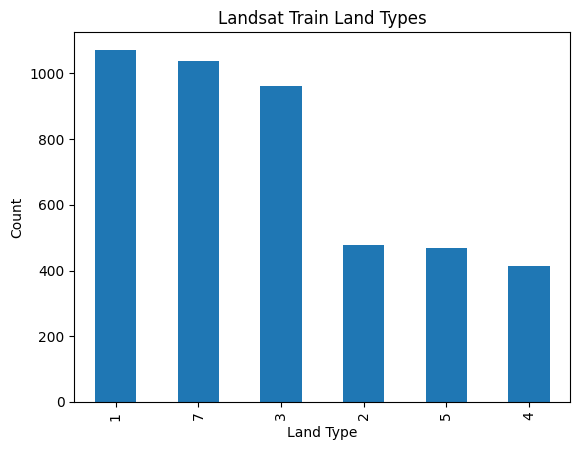

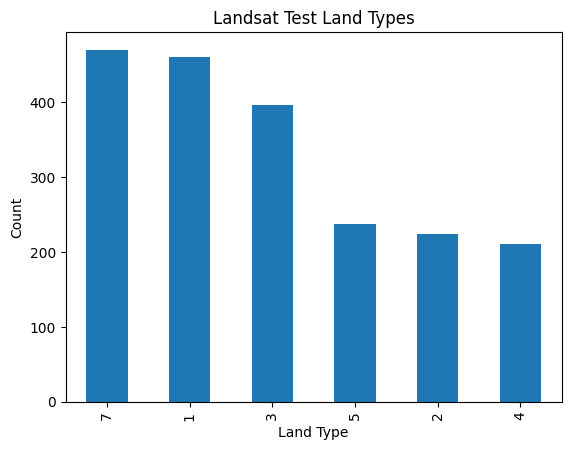

In [7]:

# prompt: Create bar plots to display the number of land types. One barplot for landsat_train and one barplot for landsat_test.

# Bar plot for landsat_train land types
landsat_train['land_type'].value_counts().plot(kind='bar', title='Landsat Train Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

# Bar plot for landsat_test land types
landsat_test['land_type'].value_counts().plot(kind='bar', title='Landsat Test Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

###Splitting Data into Train/Test


In [9]:
x_train = landsat_train.drop('land_type', axis=1)
x_test = landsat_test.drop('land_type', axis=1)
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

###Pipeline

In [10]:
numerical_features = x_train.select_dtypes(include=['number']).columns

# Create a column transformer to scale numerical features
ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features)
    ], remainder='passthrough')

# Create a pipeline with the column transformer and RandomForestClassifier
pipeline = Pipeline([
    ('transformer', ct),
    ('classifier', RandomForestClassifier())
])

###Execution of the Model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


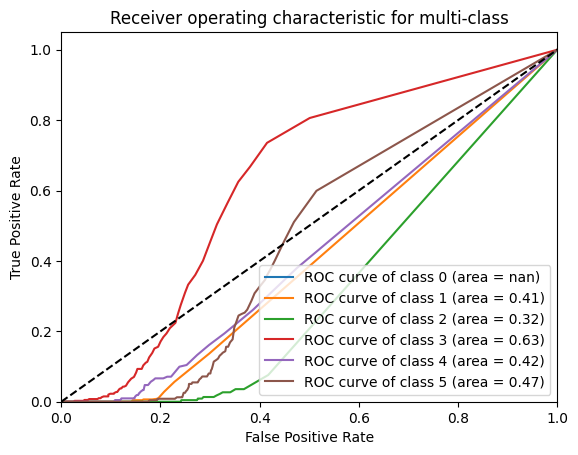

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Get predicted probabilities for the test set using the pipeline
y_pred_proba = pipeline.predict_proba(x_test)

# Get the number of classes
n_classes = y_pred_proba.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

###Evaluating Model

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.97      0.97      0.97       224
           3       0.88      0.95      0.92       397
           4       0.79      0.61      0.69       211
           5       0.92      0.89      0.90       237
           7       0.87      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000



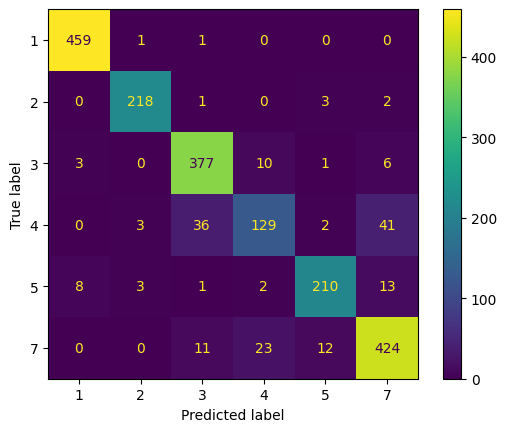

In [12]:


pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

def classification_function(y_test, y_pred):
  print(classification_report(y_test, y_pred))

classification_function(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(pipeline, x_test, y_test)
plt.show()

###Conclusion

Based on the performance indicators, the model appears to be well-suited for predicting land types. It achieves a 91% overall accuracy, correctly identifying land types in most cases. The precision and recall scores are generally high, often exceeding 0.85 for land types 1, 2, 3, 5, and 7, indicating the model’s effectiveness in recognizing true positives and minimizing false positives. However, for land type 4, the precision and recall are lower, at 0.77 and 0.63 respectively, suggesting this category is more challenging for the model, possibly due to fewer distinctive features or greater overlap with other terrain types.

The F1-scores support these findings, showing high values for most land types, particularly types 1, 2, and 3. In contrast, land type 4 has an F1-score of 0.69, highlighting the need for further refinement in this category. The model performs well across various terrain types and does not show undue bias towards any single category, as reflected in the macro and weighted averages of precision, recall, and F1-scores, which range from 0.89 to 0.91.

Overall, the model’s high accuracy and strong performance metrics for most land types suggest it is generally effective for land type prediction. The lower performance for land type 4 indicates an area for potential improvement, which could be addressed by fine-tuning the model, possibly by incorporating additional features or using more balanced training data. Despite some areas for ongoing development, the model demonstrates strong forecasting capabilities, making it a reliable tool for classifying different land types.

#Problem 2

Building, Executing, and Evaluating the Pipeline


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting Classifier:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       461
           2       0.61      0.99      0.75       224
           3       0.87      0.93      0.90       397
           4       0.58      0.67      0.62       211
           5       0.68      0.29      0.41       237
           7       0.91      0.72      0.80       470

    accuracy                           0.80      2000
   macro avg       0.76      0.77      0.74      2000
weighted avg       0.81      0.80      0.79      2000



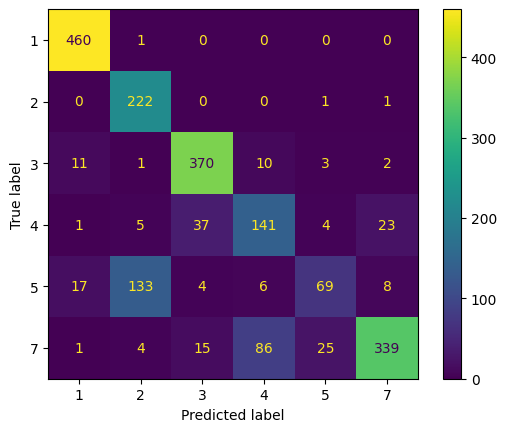

Bagging Classifier:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.98      0.98       224
           3       0.88      0.95      0.91       397
           4       0.77      0.60      0.68       211
           5       0.92      0.87      0.90       237
           7       0.86      0.90      0.88       470

    accuracy                           0.90      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.90      0.90      0.90      2000



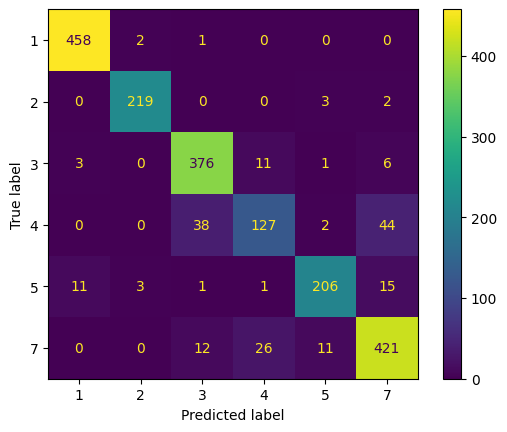

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting Classifier:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.98      0.97      0.98       224
           3       0.88      0.94      0.91       397
           4       0.79      0.64      0.70       211
           5       0.91      0.90      0.90       237
           7       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000



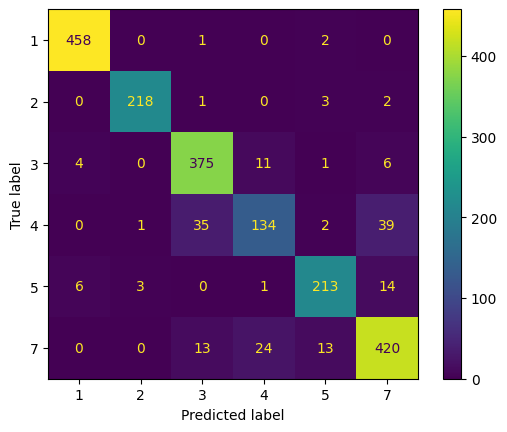

In [13]:
# Create a Voting Classifier
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()

voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('ada', ada_clf)], voting='hard')

# Create a Bagging Classifier
bagging_clf = BaggingClassifier(estimator=rf_clf, n_estimators=10, random_state=42) # Change 'base_estimator' to 'estimator'

# Create a Boosting Classifier
boosting_clf = AdaBoostClassifier(estimator=rf_clf, n_estimators=50, random_state=42) # Change 'base_estimator' to 'estimator'


# Create a pipeline with the Voting Classifier
pipeline_voting = Pipeline([
    ('transformer', ct),
    ('classifier', voting_clf)
])

# Create a pipeline with the Bagging Classifier
pipeline_bagging = Pipeline([
    ('transformer', ct),
    ('classifier', bagging_clf)
])


# Create a pipeline with the Boosting Classifier
pipeline_boosting = Pipeline([
    ('transformer', ct),
    ('classifier', boosting_clf)
])

# Fit and evaluate the Voting Classifier
pipeline_voting.fit(x_train, y_train)
y_pred_voting = pipeline_voting.predict(x_test)
print("Voting Classifier:")
classification_function(y_test, y_pred_voting)
ConfusionMatrixDisplay.from_estimator(pipeline_voting, x_test, y_test)
plt.show()

# Fit and evaluate the Bagging Classifier
pipeline_bagging.fit(x_train, y_train)
y_pred_bagging = pipeline_bagging.predict(x_test)
print("Bagging Classifier:")
classification_function(y_test, y_pred_bagging)
ConfusionMatrixDisplay.from_estimator(pipeline_bagging, x_test, y_test)
plt.show()

# Fit and evaluate the Boosting Classifier
pipeline_boosting.fit(x_train, y_train)
y_pred_boosting = pipeline_boosting.predict(x_test)
print("Boosting Classifier:")
classification_function(y_test, y_pred_boosting)
ConfusionMatrixDisplay.from_estimator(pipeline_boosting, x_test, y_test)
plt.show()


###Conclusion
The Bagging Classifier stands out as the best model for predicting land type in this dataset due to its highest overall accuracy and consistency, as indicated by the provided performance metrics. It achieves a 91% accuracy rate and excels in precision and recall for most classes, particularly classes 1 and 2, both of which have an F1-score of 0.98. However, class 4 shows some variability with an F1-score of 0.69.

In contrast, the Voting Classifier performs well in classes 1 and 2, achieving an 80% accuracy rate, but it struggles with class 5, where it has a poor recall of 0.30 and an F1-score of 0.41. This suggests that while the Voting Classifier is generally reliable, it has specific weaknesses that affect its overall effectiveness.

The Boosting Classifier performs the worst among the three, with an overall accuracy of 69%. Although it performs reasonably well in classes 2 and 7, it significantly underperforms in class 5, with an F1-score of just 0.27. This inconsistency makes the Boosting Classifier the least suitable model for this task.

Overall, the Bagging Classifier is the most effective model for classifying land types, thanks to its high accuracy and consistent performance across most classes.

#Problem 3
###Reading the Data

In [14]:
ba = pd.read_csv('/content/drive/MyDrive/MLA5_JP/banknote_authentication.csv')

In [15]:
# split data
#prompt: Create a data frame called X of your inputs that includes all columns except date and forgery.

X = ba.drop(['forgery'], axis=1)
y = ba.forgery

In [16]:
# prompt: Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#Pipeline

# prompt: Create a column transformer that will MinMax scale the numerical variables

# Get numerical features from X_train to avoid mismatch in columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Create a column transformer to scale the numerical features
ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
    ], remainder='passthrough')

In [24]:
# Create a pipeline with the column transformer and the Decision Tree Classifier
pipeline = Pipeline([
    ('transformer', ct),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

###Executing the Model


In [25]:
# prompt: Run the pipeline to fit the DecisionTreeClassification model.

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

###Evaluating Model


Precision: 1.00
Recall: 0.98
F1 Score: 0.99


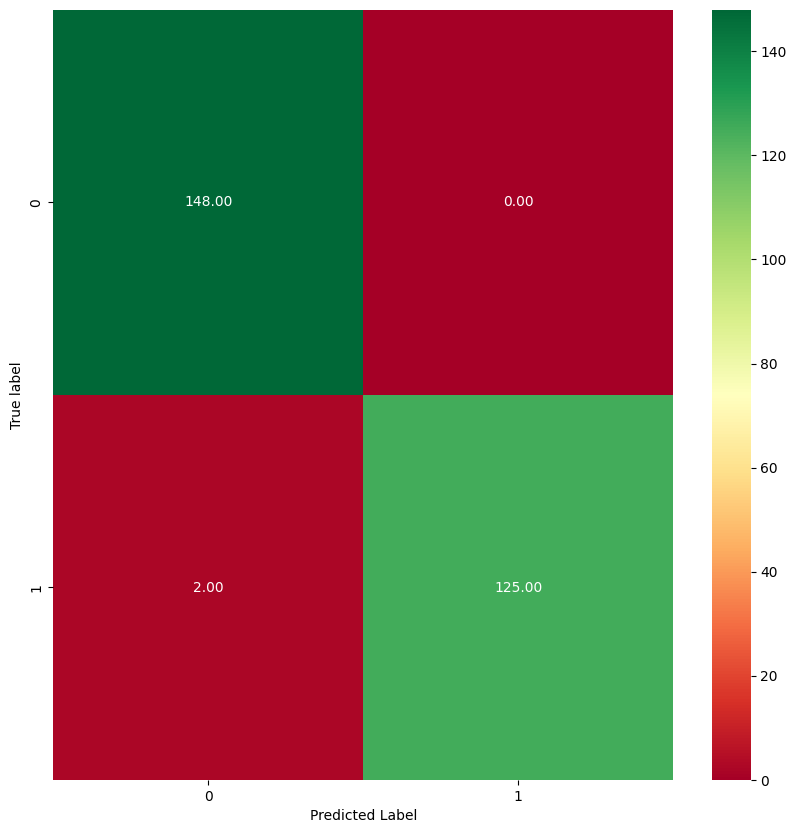

In [26]:
# prompt: Call the plot_cm function to generate the confusion matrix.
# Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results.

plot_cm(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

###Conclusion
These performance indicators highlight a model that excels in its predictions. With a precision of 1.00, the model ensures that all positive predictions are accurate, eliminating any false positives. A recall of 0.98 indicates that the model successfully identifies 98% of all true positive cases, with very few misses. The F1 Score of 0.99 demonstrates an excellent balance between precision and recall, showcasing the model’s near-perfect performance in both detecting genuine positives and avoiding false positives. This suggests a robust and reliable model that delivers highly accurate predictions with minimal errors.